In [68]:
import numpy as np 
import matplotlib.pyplot as plt


In [103]:
N =16

In [104]:
Rcapt = 5
Rcom = 6

coord_target_dict = {}
for i in range(0, 16):
    coord_target_dict[i] = [i // 4 , i % 4 ]

print(coord_target_dict)
list_capt = []
list_target = np.arange(0, N)



{0: [0, 0], 1: [0, 1], 2: [0, 2], 3: [0, 3], 4: [1, 0], 5: [1, 1], 6: [1, 2], 7: [1, 3], 8: [2, 0], 9: [2, 1], 10: [2, 2], 11: [2, 3], 12: [3, 0], 13: [3, 1], 14: [3, 2], 15: [3, 3]}


In [105]:
def dist_capt(coord1, coord2):
    return np.sqrt((coord1[0]-coord2[0])**2 + (coord1[1]-coord2[1])**2)



In [106]:
def graph_dist(list_target,coord_target):
    graph = np.zeros((len(list_target),len(list_target)))
    for i in range(len(list_target)):
        for j in range(len(list_target)):
            if i!=j:
                graph[i,j] = dist_capt(coord_target_dict[i], coord_target_dict[j])
    return graph

table_dist = graph_dist(list_target,coord_target_dict)
print(table_dist)
print(coord_target_dict.values())
#available_capt = coord_target_dict.values()



list_neighbors = []
dist_neighbors = []
number_neighbors=[]




for i in range(N):

    list_neighbors.append([])
    dist_neighbors.append([])
    for (j,target_neigh) in enumerate(list_target):
    
        if i!=j:
            if table_dist[i,j] <= 1.5:
                
                list_neighbors[i].append(target_neigh)
                dist_neighbors[i].append(table_dist[i,j])



[[0.         1.         2.         3.         1.         1.41421356
  2.23606798 3.16227766 2.         2.23606798 2.82842712 3.60555128
  3.         3.16227766 3.60555128 4.24264069]
 [1.         0.         1.         2.         1.41421356 1.
  1.41421356 2.23606798 2.23606798 2.         2.23606798 2.82842712
  3.16227766 3.         3.16227766 3.60555128]
 [2.         1.         0.         1.         2.23606798 1.41421356
  1.         1.41421356 2.82842712 2.23606798 2.         2.23606798
  3.60555128 3.16227766 3.         3.16227766]
 [3.         2.         1.         0.         3.16227766 2.23606798
  1.41421356 1.         3.60555128 2.82842712 2.23606798 2.
  4.24264069 3.60555128 3.16227766 3.        ]
 [1.         1.41421356 2.23606798 3.16227766 0.         1.
  2.         3.         1.         1.41421356 2.23606798 3.16227766
  2.         2.23606798 2.82842712 3.60555128]
 [1.41421356 1.         1.41421356 2.23606798 1.         0.
  1.         2.         1.41421356 1.         1.4

In [107]:
is_taken = dict.fromkeys(coord_target_dict.keys(), 0)
is_taken[0] = 2

# Add the list of neighbors for each key
for key, neighbors in enumerate(list_neighbors):
    
    is_taken[key] = [is_taken[key], neighbors, dist_neighbors[key], is_taken[key]]


print(is_taken)

{0: [2, [1, 4, 5], [1.0, 1.0, 1.4142135623730951], 2], 1: [0, [0, 2, 4, 5, 6], [1.0, 1.0, 1.4142135623730951, 1.0, 1.4142135623730951], 0], 2: [0, [1, 3, 5, 6, 7], [1.0, 1.0, 1.4142135623730951, 1.0, 1.4142135623730951], 0], 3: [0, [2, 6, 7], [1.0, 1.4142135623730951, 1.0], 0], 4: [0, [0, 1, 5, 8, 9], [1.0, 1.4142135623730951, 1.0, 1.0, 1.4142135623730951], 0], 5: [0, [0, 1, 2, 4, 6, 8, 9, 10], [1.4142135623730951, 1.0, 1.4142135623730951, 1.0, 1.0, 1.4142135623730951, 1.0, 1.4142135623730951], 0], 6: [0, [1, 2, 3, 5, 7, 9, 10, 11], [1.4142135623730951, 1.0, 1.4142135623730951, 1.0, 1.0, 1.4142135623730951, 1.0, 1.4142135623730951], 0], 7: [0, [2, 3, 6, 10, 11], [1.4142135623730951, 1.0, 1.0, 1.4142135623730951, 1.0], 0], 8: [0, [4, 5, 9, 12, 13], [1.0, 1.4142135623730951, 1.0, 1.0, 1.4142135623730951], 0], 9: [0, [4, 5, 6, 8, 10, 12, 13, 14], [1.4142135623730951, 1.0, 1.4142135623730951, 1.0, 1.0, 1.4142135623730951, 1.0, 1.4142135623730951], 0], 10: [0, [5, 6, 7, 9, 11, 13, 14, 15], 

In [108]:
is_covered = dict.fromkeys(coord_target_dict.keys(), 0)
is_covered[0] = 2

for key, neighbors in enumerate(list_neighbors):
    is_covered[key] = [is_covered[key],neighbors, dist_neighbors[key]]
is_covered

{0: [2, [1, 4, 5], [1.0, 1.0, 1.4142135623730951]],
 1: [0,
  [0, 2, 4, 5, 6],
  [1.0, 1.0, 1.4142135623730951, 1.0, 1.4142135623730951]],
 2: [0,
  [1, 3, 5, 6, 7],
  [1.0, 1.0, 1.4142135623730951, 1.0, 1.4142135623730951]],
 3: [0, [2, 6, 7], [1.0, 1.4142135623730951, 1.0]],
 4: [0,
  [0, 1, 5, 8, 9],
  [1.0, 1.4142135623730951, 1.0, 1.0, 1.4142135623730951]],
 5: [0,
  [0, 1, 2, 4, 6, 8, 9, 10],
  [1.4142135623730951,
   1.0,
   1.4142135623730951,
   1.0,
   1.0,
   1.4142135623730951,
   1.0,
   1.4142135623730951]],
 6: [0,
  [1, 2, 3, 5, 7, 9, 10, 11],
  [1.4142135623730951,
   1.0,
   1.4142135623730951,
   1.0,
   1.0,
   1.4142135623730951,
   1.0,
   1.4142135623730951]],
 7: [0,
  [2, 3, 6, 10, 11],
  [1.4142135623730951, 1.0, 1.0, 1.4142135623730951, 1.0]],
 8: [0,
  [4, 5, 9, 12, 13],
  [1.0, 1.4142135623730951, 1.0, 1.0, 1.4142135623730951]],
 9: [0,
  [4, 5, 6, 8, 10, 12, 13, 14],
  [1.4142135623730951,
   1.0,
   1.4142135623730951,
   1.0,
   1.0,
   1.414213562373095

In [109]:

indices_less_than_R = np.where(table_dist[1] < 1.5)
#print(indices_less_than_R)
print(list_neighbors)


[[1, 4, 5], [0, 2, 4, 5, 6], [1, 3, 5, 6, 7], [2, 6, 7], [0, 1, 5, 8, 9], [0, 1, 2, 4, 6, 8, 9, 10], [1, 2, 3, 5, 7, 9, 10, 11], [2, 3, 6, 10, 11], [4, 5, 9, 12, 13], [4, 5, 6, 8, 10, 12, 13, 14], [5, 6, 7, 9, 11, 13, 14, 15], [6, 7, 10, 14, 15], [8, 9, 13], [8, 9, 10, 12, 14], [9, 10, 11, 13, 15], [10, 11, 14]]


In [110]:
def number_covered(is_taken, key):
    nb_capts = 0
    for x in is_taken[key][1]:
        
        if is_taken[x][0] == 1:
            nb_capts += 1
    if is_taken[key][0] == 1:
        nb_capts += 1
    return nb_capts

In [92]:
N = 16

In [111]:
def gloutonne1(graph, is_taken, Rcapt, coord_target_dict, Rcom, list_neighbors, k):
    graph_copy= graph
    n = int(np.sqrt(len(graph)))
    print(n)

    for i in range(16-1, 0, -1):

        # If there are indices less than R, find the maximum among those values
        indices_less_than_R = is_taken[i][1]

        if len(indices_less_than_R) > 0:
            k1 = number_covered(is_taken, i)
            print(k1, k)
            while k1 < k:

                max_value_below_R = np.max(graph_copy[i][indices_less_than_R])
                if max_value_below_R == 0:
                    raise ValueError("There are no values below R.")
                max_index_below_R = np.argmax(graph_copy[i] == max_value_below_R)

                graph_copy[i,max_index_below_R] = 0
                if is_taken[max_index_below_R][0] == 0:
                    is_taken[max_index_below_R][0] = 1
                    k1+=1
                if k1==k:
                    is_taken[i][3] = 1
                    print("captured")
                    print(is_taken)
                    
                    
                print(max_value_below_R)
        else:
            print("There are no values below R.")

        list_capt.append(i)

In [112]:
gloutonne1(table_dist, is_taken, Rcapt, coord_target_dict, Rcom, list_neighbors, 2)


4
0 2
1.4142135623730951
captured
{0: [2, [1, 4, 5], [1.0, 1.0, 1.4142135623730951], 2], 1: [0, [0, 2, 4, 5, 6], [1.0, 1.0, 1.4142135623730951, 1.0, 1.4142135623730951], 0], 2: [0, [1, 3, 5, 6, 7], [1.0, 1.0, 1.4142135623730951, 1.0, 1.4142135623730951], 0], 3: [0, [2, 6, 7], [1.0, 1.4142135623730951, 1.0], 0], 4: [0, [0, 1, 5, 8, 9], [1.0, 1.4142135623730951, 1.0, 1.0, 1.4142135623730951], 0], 5: [0, [0, 1, 2, 4, 6, 8, 9, 10], [1.4142135623730951, 1.0, 1.4142135623730951, 1.0, 1.0, 1.4142135623730951, 1.0, 1.4142135623730951], 0], 6: [0, [1, 2, 3, 5, 7, 9, 10, 11], [1.4142135623730951, 1.0, 1.4142135623730951, 1.0, 1.0, 1.4142135623730951, 1.0, 1.4142135623730951], 0], 7: [0, [2, 3, 6, 10, 11], [1.4142135623730951, 1.0, 1.0, 1.4142135623730951, 1.0], 0], 8: [0, [4, 5, 9, 12, 13], [1.0, 1.4142135623730951, 1.0, 1.0, 1.4142135623730951], 0], 9: [0, [4, 5, 6, 8, 10, 12, 13, 14], [1.4142135623730951, 1.0, 1.4142135623730951, 1.0, 1.0, 1.4142135623730951, 1.0, 1.4142135623730951], 0], 10: 

In [53]:
print(is_taken)

{0: [2, [1, 3, 4], [1.0, 1.0, 1.4142135623730951], 2], 1: [0, [0, 2, 3, 4, 5], [1.0, 1.0, 1.4142135623730951, 1.0, 1.4142135623730951], 0], 2: [0, [1, 4, 5], [1.0, 1.4142135623730951, 1.0], 0], 3: [0, [0, 1, 4, 6, 7], [1.0, 1.4142135623730951, 1.0, 1.0, 1.4142135623730951], 0], 4: [0, [0, 1, 2, 3, 5, 6, 7, 8], [1.4142135623730951, 1.0, 1.4142135623730951, 1.0, 1.0, 1.4142135623730951, 1.0, 1.4142135623730951], 0], 5: [0, [1, 2, 4, 7, 8], [1.4142135623730951, 1.0, 1.0, 1.4142135623730951, 1.0], 0], 6: [0, [3, 4, 7], [1.0, 1.4142135623730951, 1.0], 0], 7: [0, [3, 4, 5, 6, 8], [1.4142135623730951, 1.0, 1.4142135623730951, 1.0, 1.0], 0], 8: [0, [4, 5, 7], [1.4142135623730951, 1.0, 1.0], 0]}


In [115]:
print(coord_target_dict)

{0: [0, 0], 1: [0, 1], 2: [0, 2], 3: [0, 3], 4: [1, 0], 5: [1, 1], 6: [1, 2], 7: [1, 3], 8: [2, 0], 9: [2, 1], 10: [2, 2], 11: [2, 3], 12: [3, 0], 13: [3, 1], 14: [3, 2], 15: [3, 3]}


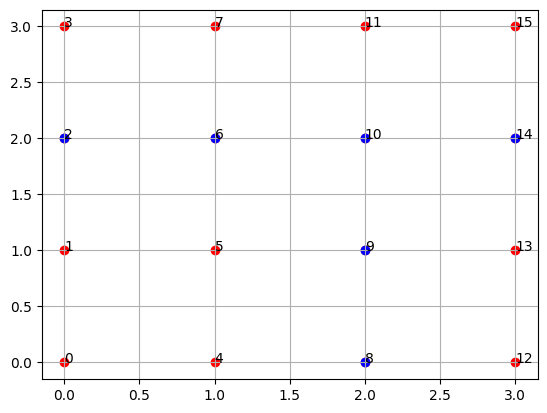

In [117]:
plt.grid()
plt.scatter([coord_target_dict[i][1] for i in range(N)], [coord_target_dict[i][0] for i in range(N)], c='r')
#plt.imshow(table_dist)
for i in range(16):
    if is_taken[i][0] == 1:
        plt.scatter(coord_target_dict[i][1], coord_target_dict[i][0], c='b')
    plt.annotate(str(i), (coord_target_dict[i][0], coord_target_dict[i][1]))
#plt.angle_spectrum()
plt.show()

In [11]:

#np.partition(table_dist[i], -2)[-2:]
def gloutonne(graph, is_taken, Rcapt, coord_target_dict, Rcom, list_neighbors, k):
    graph_copy= graph
    n = len(list_target)

    for i in range(n, 0, -1):

        # If there are indices less than R, find the maximum among those values
        indices_less_than_R = np.where(graph_copy[i] < Rcapt)

        for j in range(n, -1, -1):  

            if len(indices_less_than_R[0]) > 0:
                for l in range(k):

                    max_value_below_R = np.max(is_taken[i][indices_less_than_R])
                    max_index_below_R = np.argmax(graph_copy[i] == max_value_below_R)
                    graph_copy[i,max_index_below_R]=0
                    print(max_value_below_R)
            else:
                print("There are no values below R.")

        list_capt.append(i)

In [17]:
np.max([0,1,2,3,4])

4

In [68]:
gloutonne(table_dist, list_target, 1.5, 2, list_neighbors,k=2)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
